In [7]:
from torch.utils.data import Dataset, DataLoader
from collections import OrderedDict
import cv2 
# on chloe's local computer, to turn do conda activate py36 

In [8]:
from torch.utils.data import Dataset, DataLoader
import glob
import os
from skimage.io import imread
# from albumentations.pytorch import ToTensorV2
# from albumentations import HorizontalFlip, VerticalFlip, RandomRotate90, Normalize
# from albumentations import OneOf, Compose
# from collections import OrderedDict
# from ever.interface import ConfigurableMixin
# from torch.utils.data import SequentialSampler, RandomSampler
# from ever.api.data import CrossValSamplerGenerator
# # import numpy as np
# # import logging
# # from utils.tools import seed_worker

# logger = logging.getLogger(__name__)


# LABEL_MAP = OrderedDict(
#     Background=0,
#     Building=1,
#     Road=2,
#     Water=3,
#     Barren=4,
#     Forest=5,
#     Agricultural=6
# )

from PIL import Image
import numpy as np

COLOR_MAP = dict(
    IGNORE=(0, 0, 0),
    Background=(255, 255, 255),
    Building=(255, 0, 0),
    Road=(255, 255, 0),
    Water=(0, 0, 255),
    Barren=(159, 129, 183),
    Forest=(0, 255, 0),
    Agricultural=(255, 195, 128),
)

def render(mask_path, vis_path):
    segmentation_map = np.array(Image.open(mask_path)).astype(np.uint8) # returns class values for each pixel 
    cm = np.array(list(COLOR_MAP.values())).astype(np.uint8) # returns color map values that correspond to the class values per pixel 
    color_img = cm[segmentation_map]
    color_img = Image.fromarray(np.uint8(color_img))
    color_img.save(vis_path)
    

mask_path = '/media/data_16T/chloe/try/Train/Urban/masks_png/1366.png'
vis_path = '/media/data_16T/chloe/try/Train/Urban/images_png/1366.png'


# segmentation_map = np.array(Image.open(mask_path)).astype(np.uint8)

    #  mask_path = r'C:\Users\86158\Desktop\Wujin_9_6.png'
    # vis_path = r'C:\Users\86158\Desktop\Wujin_9_6_vis.png'

render(mask_path, vis_path)


In [9]:
def color_palette():
    """Color palette that maps each class to RGB values.
    
    This one is actually taken from ADE20k.
    """
    return [[255, 255, 255], [255,0,0], [255,255,0], [0,0,255], [159,129,183], [0,255,0], [255,195, 128]]

palette = color_palette()
palette

[[255, 255, 255],
 [255, 0, 0],
 [255, 255, 0],
 [0, 0, 255],
 [159, 129, 183],
 [0, 255, 0],
 [255, 195, 128]]

In [36]:
# colored_mask = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8)
# for class_value, color in COLOR_MAP.items():
#     class_pixels = np.where(normal_image == class_value)
#     colored_mask[class_pixels] = color_palette[class_value]


# # cv2.imwrite("colored_mask.png", colored_mask)



In [14]:
for class_value, color in COLOR_MAP.items():
    print(class_value)
    print(color)


IGNORE
(0, 0, 0)
Background
(255, 255, 255)
Building
(255, 0, 0)
Road
(255, 255, 0)
Water
(0, 0, 255)
Barren
(159, 129, 183)
Forest
(0, 255, 0)
Agricultural
(255, 195, 128)


# Mapping

In [16]:
COLOR_MAP

{'IGNORE': (0, 0, 0),
 'Background': (255, 255, 255),
 'Building': (255, 0, 0),
 'Road': (255, 255, 0),
 'Water': (0, 0, 255),
 'Barren': (159, 129, 183),
 'Forest': (0, 255, 0),
 'Agricultural': (255, 195, 128)}

In [17]:
class_map ={
    0: "Ignore",
    1: "Background",
    2: "Building",
    3: "Road",
    4: "Water",
    5: "Barren",
    6: "Forest",
    7: "Agricultural"
}

In [19]:
color_mapping = {
    1: [0,0,0],
    2: [255, 255, 255],   # Example mapping for number 1 to red color
    3: [255, 255, 0],   # Example mapping for number 2 to green color
    4: [0, 0, 255],   # Example mapping for number 3 to blue color
    5: [159, 129, 183], 
    6: [0,255,0],
    7: [255,195,128]
}

In [31]:
for i in range(1024):
    for j in range(1024):
        number = segmentation_map[i, j, 0]  # Assuming number is in the first channel
        color = color_mapping.get(number, [0, 0, 0])  # Retrieve color from dictionary or default to black
        color_segmentation_map[i, j, :] = color

# Mapping code that works

In [32]:
color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
i = 0
while i < 2:
    for i in segmentation_map[i][i]:
        if segmentation_map[i][i][1] == 6:
            color_segmentation_map[:] = [255, 195, 128]
        i += 1

In [29]:
img = cv2.imread("/media/data_16T/chloe/999.png") # NOTE: need to copy the entire path, not just the relative path 
np.array(img)

array([[[50, 43, 30],
        [54, 44, 33],
        [43, 44, 31],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[46, 38, 30],
        [39, 37, 29],
        [43, 40, 29],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[46, 41, 32],
        [38, 37, 28],
        [43, 40, 31],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[48, 56, 66],
        [46, 50, 61],
        [44, 48, 58],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[51, 56, 64],
        [54, 56, 66],
        [54, 58, 66],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[64, 61, 72],
        [62, 63, 73],
        [61, 65, 75],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

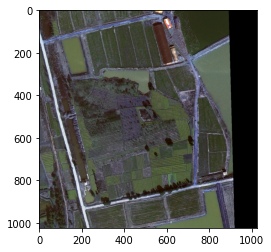

In [34]:
ground_truth_color_seg = color_segmentation_map[..., ::-1] # reverses the colo channel into BGR
ground_truth_color_seg

colored_mask = np.array(normal_image) * 0.5 + ground_truth_color_seg * 0.5
colored_mask = img.astype(np.uint8)

plt.imshow(img)
plt.show()

# Data loading

In [ ]:
from torch.utils.data import Dataset 
import torchvision.transforms as transforms

transforms = transforms.Compose([
    transforms.RandomCrop(width=512, height=512),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

test_transform = transforms.Compose([
    transforms.Resize(width=512,height=512), 
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

class LoveDA(Dataset):
    def __init__(self, imagePaths, maskPaths, transforms):
        self.imagePaths = imagePaths
        self.maskPaths = maskPaths 
        self.transforms = transforms 

        self.image_files=os.listdir("/media/data_16T/chloe/try/Train/Urban/images_png")
        self.mask_files = os.listdir("/media/data_16T/chloe/try/Train/Urban/masks_png")

    def __len__(self):
        return len(self.imagePaths)
    
    def __getitem__(self, idx):
        imagePath = os.path.join(self.image_dir, self.image_files[idx])
        maskPath = os.path.join(self.mask_dir, self.mask_files[idx])

        image = Image.open(imagePath).convert("RGB")
        mask = Image.open(maskPath).convert("L")

   
        if self.transforms:
            image = self.transforms(image)
            mask = self.transforms(mask)
        
        return (image, mask)

In [ ]:
train_dataset = LoveDA(train_image_dir, train_mask_dir, transform=transform)
val_dataset = LoveDA(val_image_dir, val_mask_dir, transform=transform)
test_dataset = LoveDA(test_image_dir, test_mask_dir, transform=transform)


train_image_dir = "/media/data_16T/chloe/try/Train/Urban/images_png"
train_mask_dir = "/media/data_16T/chloe/try/Train/Urban/masks_png"
val_image_dir = ""